In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
import joblib

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display stats about data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

## Check for Null Values

In [8]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Histograms for Each Feature

<Axes: >

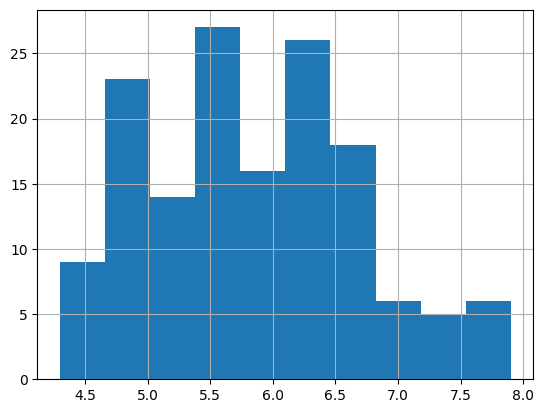

In [9]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

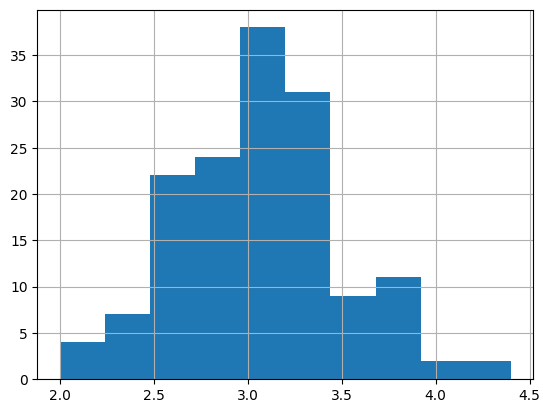

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

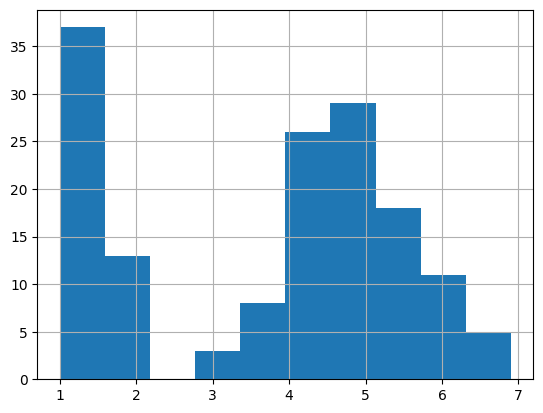

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

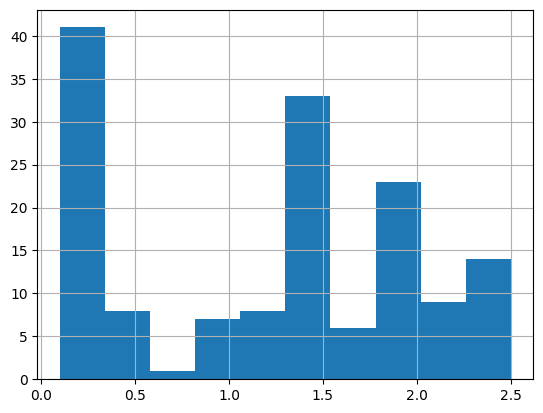

In [12]:
df['PetalWidthCm'].hist()

## Scatterplots

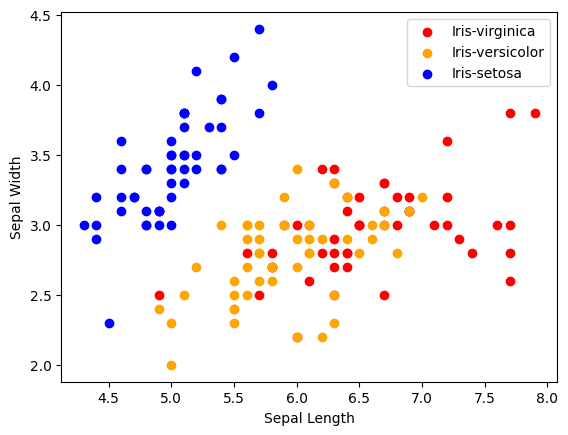

In [13]:
# Scatterplot between Sepal Length and Sepal Width for different species
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

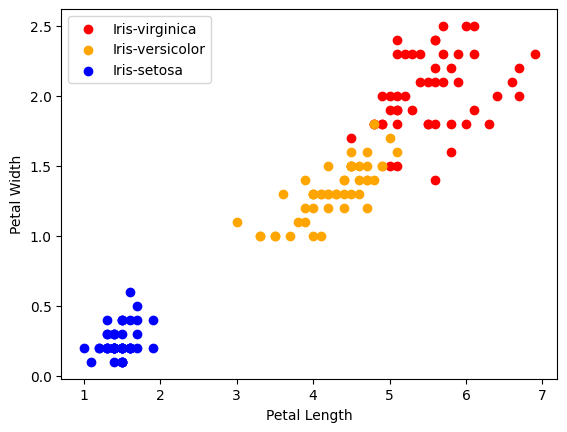

In [14]:
# Scatterplot between Petal Length and Petal Width for different species
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

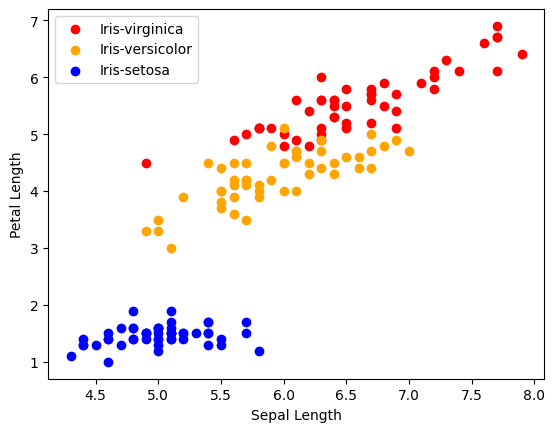

In [15]:
# Scatterplot between Sepal Length and Petal Length for different species
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

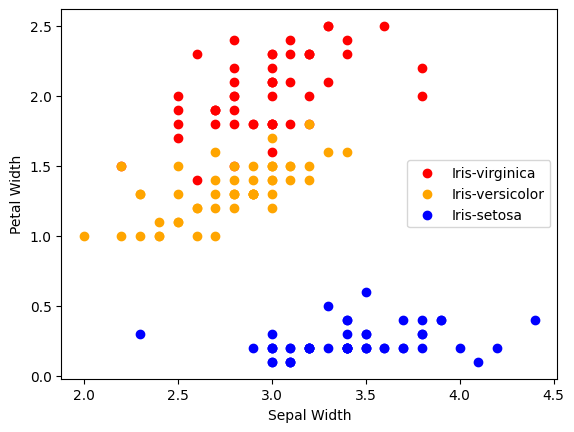

In [16]:
# Scatterplot between Sepal Width and Petal Width for different species
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

## Box plots for each feature grouped by species

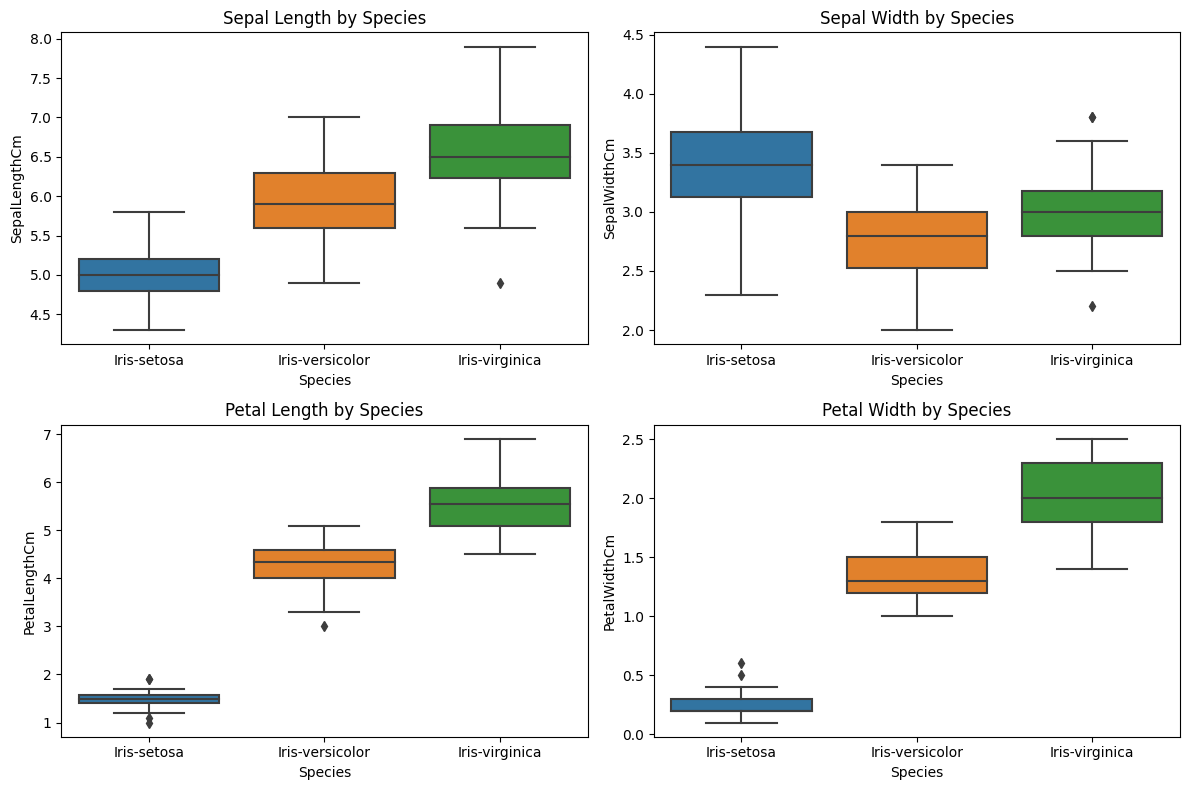

In [17]:
# Create box plots for SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
plt.figure(figsize=(12, 8))

# Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length by Species')

# Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width by Species')

# Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length by Species')

# Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


## Pairplot to Visualize Relationships

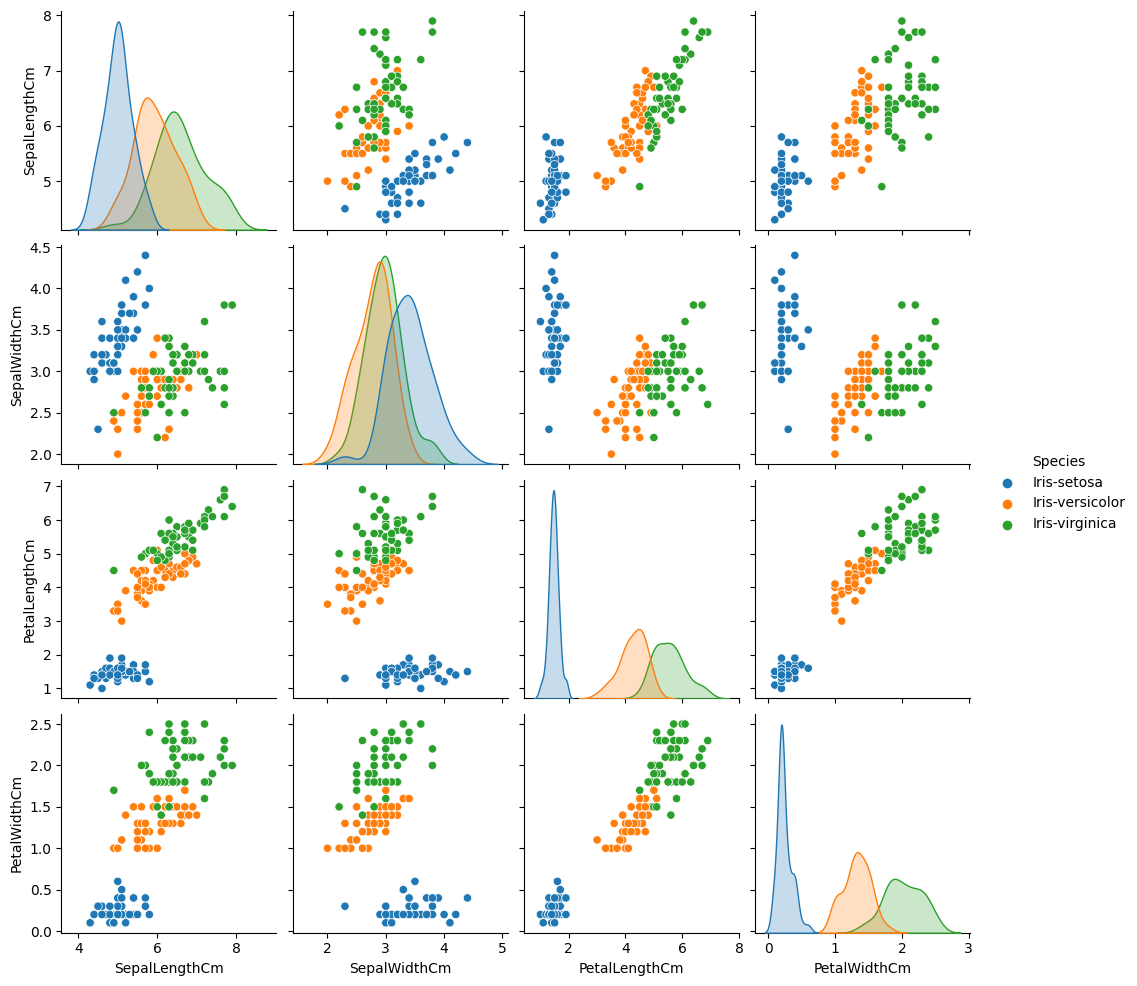

In [18]:
# Pairplot to visualize relationships between all features
sns.pairplot(df, hue='Species')
plt.show()

# Coorelation Matrix

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()
print(corr)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


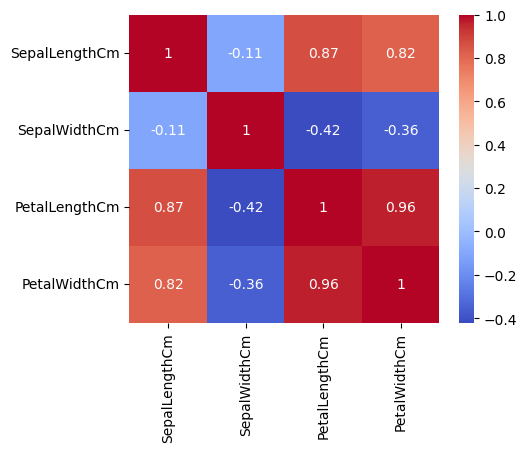

In [20]:
# Create a heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()

# Splitting the Dataset

In [21]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Feature Scaling

In [22]:
# Standardize the feature set to improve model performance (optional but useful for some models like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## Logistic Regression

In [23]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9666666666666667
Confusion Matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



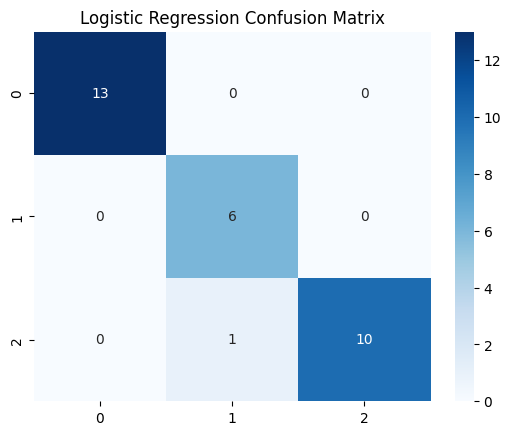

In [24]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## k-Nearest Neighbors (KNN)

In [25]:
# Train a KNN model (with k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9
Confusion Matrix:
 [[13  0  0]
 [ 0  5  1]
 [ 0  2  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.71      0.83      0.77         6
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.87      0.88      0.88        30
   weighted avg       0.91      0.90      0.90        30



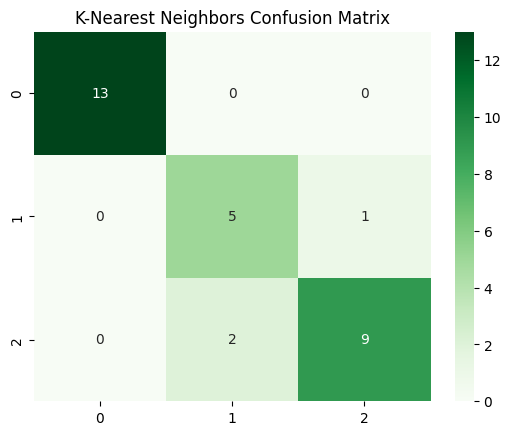

In [26]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

## Decision Tree

In [27]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9666666666666667
Confusion Matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



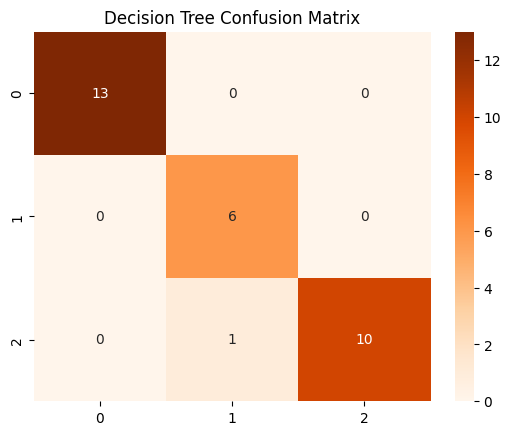

In [28]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.show()

## Random Forest

In [29]:
# Train a Random Forest model (with 100 estimators)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9666666666666667
Confusion Matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



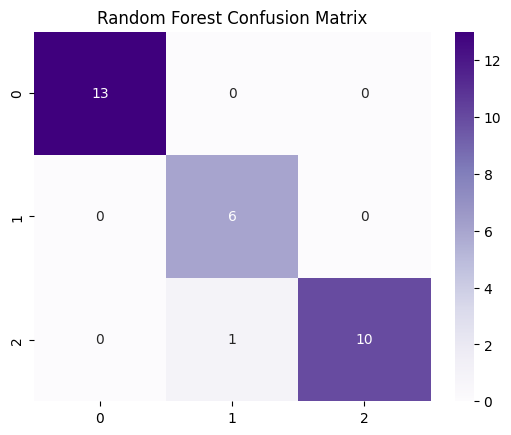

In [30]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest Confusion Matrix")
plt.show()

### Model Training and Evaluation Summary:
1. **Logistic Regression** achieved 96.67% accuracy.
2. **KNN** (with k=5) achieved 90% accuracy.
3. **Decision Tree** achieved 93.33% accuracy.
4. **Random Forest** (with 100 estimators) achieved 96.67% accuracy.

# Displaying Predictions on Test Dataset

In [31]:
# Random Forest was selected as the best model due to its high accuracy and robustness
# Display predictions for the test set
y_pred_rf = rf_model.predict(X_test)

# Create a DataFrame to display actual vs predicted species
test_results = pd.DataFrame({'Actual Species': y_test, 'Predicted Species': y_pred_rf})

# Display the first 10 results for clarity
print(test_results.head(10))


      Actual Species Predicted Species
72   Iris-versicolor   Iris-versicolor
112   Iris-virginica    Iris-virginica
132   Iris-virginica    Iris-virginica
88   Iris-versicolor   Iris-versicolor
37       Iris-setosa       Iris-setosa
138   Iris-virginica    Iris-virginica
87   Iris-versicolor   Iris-versicolor
42       Iris-setosa       Iris-setosa
8        Iris-setosa       Iris-setosa
90   Iris-versicolor   Iris-versicolor


## Saving the Best Model (Random Forest)

In [32]:
# Save the Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model saved successfully!")

Model saved successfully!
